
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The objective of this experiment is to understand how to implement MLP using PyTorch. 

In this experiment we will be using MNIST database. The MNIST database is a dataset of handwritten digits. It has 60,000 training samples, and 10,000 test samples. Each image is represented by 28 x 28 pixels, each containing a value 0 - 255 with its gray scale value.

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

#### PyTorch

It’s a Python based scientific computing package targeted at two sets of audiences:

1. A replacement for NumPy to use the power of GPUs

2. a deep learning research platform that provides maximum flexibility and speed

For more information refer the following url :

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

In this experiment will be implementing MLP using Pytorch. We are going to do this step-by-step:

    1. Load MNIST dataset, and visualize
    2. Define the Neural Network
    3. Define loss and optimizer
    4. Train the model
    5. Test the model

In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="520" height="240" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_blr_b6/cfus/module_2_week_7_experment_4.mp4" type="video/mp4">
</video>
""")

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M2W7_SAT_EXP_4" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
torch.__version__

#### Importing Required Packages

In [0]:
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 10
learning_rate = 0.001

#### 1. Loading MNIST dataset

Now, we'll load the MNIST data. First time we may have to download the data, which can take a while.

requires_grad=True

In [0]:
#Loading the train set file
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
#Loading the test set file
test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

Processing...
Done!


Loading the dataset using "Dataloader" - this dataloader will return batches of data.

In [0]:
#loading the train dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# loading the test dataset

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

The train and test data are provided via data loaders that provide iterators over the datasets. Loading X and Y train values from the loader.

In [0]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([10, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([10]) type: torch.LongTensor


#### Plotting first 10 training digits

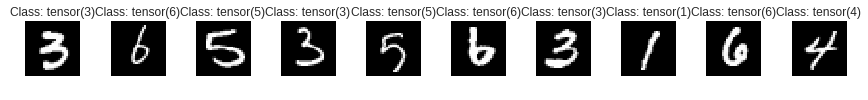

In [0]:
pltsize=1
plt.figure(figsize=(15*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

#### 2. Defining the Neural Network

Let's define the network as a Python class. This Python class inherits functions from _nn.module_.

There are three convenient functions that are defined in this class:

- ### **\__init__()**:
In this function, we shall declare all the layers of our neural network, including the number of neurons, non-linear activations, etc.

- ### **forward()**:
This is the function that is used to compute forward pass of the network. Here, we shall connect the different layers we had defined in \__init__, according to the network architecture we want to make. In this case, $x -> fc1 -> relu -> fc2 -> out$.

"forward" can be called by calling the object of this class directly. For example:

```
net = Network()
out = net(x)
```

- ### **backward()**:
This function is used to compute gradients across the entire network, and is called from the loss function at the end of the network.

```
loss.backward()
```

We have to write the **__init__()** and **forward()** methods, and PyTorch will automatically generate a **backward()** method for computing the gradients for the backward pass.

In [0]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

#### Creating a neural network object

In [0]:
net = Net(input_size, hidden_size, num_classes)

#### 3. Loss and Optimizer

We shall use the Cross Entropy Loss function as the loss.

In [0]:
criterion = nn.CrossEntropyLoss()

We shall use SGD as the optimizer.

In [0]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)  

#### 4. Train the Model

In [0]:
# In each epoch
for epoch in range(num_epochs):
    
    # For each batch of images in train set
    for i, (images, labels) in enumerate(train_loader):
        
        # Convert torch tensor to Variable
        images = images.view(-1, 28*28)
        labels = labels
        
        # Initialize gradients to 0
        optimizer.zero_grad()
        
        # Forward pass (this calls the "forward" function within Net)
        outputs = net(images)
        
        # Find the loss
        loss = criterion(outputs, labels)
        
        # Find the gradients of all weights using the loss
        loss.backward()
        
        # Update the weights using the optimizer
        # For e.g.: w = w - (delta_w)*lr
        optimizer.step()
        
        if (i+1) % 1000 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))


Epoch [1/10], Step [1000/6000], Loss: 2.3059
Epoch [1/10], Step [2000/6000], Loss: 2.2992
Epoch [1/10], Step [3000/6000], Loss: 2.2960
Epoch [1/10], Step [4000/6000], Loss: 2.2998
Epoch [1/10], Step [5000/6000], Loss: 2.2951
Epoch [1/10], Step [6000/6000], Loss: 2.2831
Epoch [2/10], Step [1000/6000], Loss: 2.2915
Epoch [2/10], Step [2000/6000], Loss: 2.2838
Epoch [2/10], Step [3000/6000], Loss: 2.2462
Epoch [2/10], Step [4000/6000], Loss: 2.2449
Epoch [2/10], Step [5000/6000], Loss: 2.2853
Epoch [2/10], Step [6000/6000], Loss: 2.2142
Epoch [3/10], Step [1000/6000], Loss: 2.2690
Epoch [3/10], Step [2000/6000], Loss: 2.2167
Epoch [3/10], Step [3000/6000], Loss: 2.1765
Epoch [3/10], Step [4000/6000], Loss: 2.1726
Epoch [3/10], Step [5000/6000], Loss: 2.0921
Epoch [3/10], Step [6000/6000], Loss: 2.0827
Epoch [4/10], Step [1000/6000], Loss: 2.0760
Epoch [4/10], Step [2000/6000], Loss: 2.0991
Epoch [4/10], Step [3000/6000], Loss: 2.1547
Epoch [4/10], Step [4000/6000], Loss: 2.0181
Epoch [4/1

#### 5. Test the Model

In [0]:
correct = 0
total = 0
# For each batch of images in test set
for images, labels in test_loader:
    
    # Get the images
    images = images.view(-1, 28*28)
    
    # Find the output by doing a forward pass through the network
    outputs = net(images)
    
    # Find the class of each sample by taking a max across the probabilities of each class
    _, predicted = torch.max(outputs.data, 1)
    
    # Increment 'total', and 'correct' according to whether the prediction was correct or not
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 82 %


#### Exercise 1:

Play with number of epochs, batch_size, hidden layer size, non-linearity, etc.

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")